# Project 3 - Wikipedia
Emma Lynn, Nathan Freestone, & Robiul Islam

In [4]:
import wikipediaapi
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import requests
from bs4 import BeautifulSoup
import re

## Analysis 1: What Aspects of a School's "Reputation" (Based Off Its Wikipedia Article) Are Related To Enrollment Levels?

We were wondering what aspects of a school's reputation can be correlated to the level of enrollment at that school. We decided to use schools' Wikipedia pages as samplings of their "reputation".

First, we pulled the content of the Wikipedia pages for 15 public colleges or universities in Utah using the Wikipedia API.

In [5]:
wiki_wiki = wikipediaapi.Wikipedia('CS-5830-proj3', 'en')

In [6]:
usu_text = wiki_wiki.page("Utah State University")
uofu_text = wiki_wiki.page("University of Utah")
uvu_text = wiki_wiki.page("Utah Valley University")
suu_text = wiki_wiki.page("Southern Utah University")
utech_text = wiki_wiki.page("Utah Tech University")
weber_text = wiki_wiki.page("Weber State University")
bridgerland_text = wiki_wiki.page("Bridgerland Technical College")
davis_text = wiki_wiki.page("Davis Technical College")
mountainland_text = wiki_wiki.page("Mountainland Technical College")
ogden_text = wiki_wiki.page("Ogden-Weber Technical College")
slcc_text = wiki_wiki.page("Salt Lake Community College")
snow_text = wiki_wiki.page("Snow College")
southwest_text = wiki_wiki.page("Southwest Technical College")
tooele_text = wiki_wiki.page("Tooele Technical College")
uintah_text = wiki_wiki.page("Uintah Basin Technical College")

Next, we counted the occurrences of certain key words within the Wikipedia articles. We divided the number of occurrences by the word count of the article to normalize for articles of different lengths. We grouped the key words into "topics" to base our analysis on. These topics and key words were:

* Culture
    * campus
    * university
    * clubs
    * events
* STEM
    * science
    * technology
    * engineering
    * math
* Athletics
    * football
    * basketball
    * volleyball
    * sports
* Academia
    * research
    * graduate
    * undergraduate
    * honors

We also added all of the keyword scores together to come up with a sum score.

In [7]:
def search_for_words(text):
    text = text.lower()
    words_to_count = ["campus", "university", "clubs", "events", "science", "engineering", "technology", "math", "football", "basketball", "sports", "volleyball", "research", "undergraduate", "graduate", "honors"]
    word_count = {word: 0 for word in words_to_count}
    words = text.split()
    word_count["word count"] = len(words)
    for word in words:
        if word in word_count:
            word_count[word] += 1

    sum = 0
    for word in words_to_count:
        word_count[word] = round(word_count[word] / word_count["word count"], 4)
        sum += word_count[word]
    word_count["sum"] = round(sum, 4)

    return word_count

data = {
    "USU": search_for_words(usu_text.text),
    "U of U": search_for_words(uofu_text.text),
    "UVU": search_for_words(uvu_text.text),
    "SUU": search_for_words(suu_text.text),
    "UT Tech": search_for_words(utech_text.text),
    "Weber": search_for_words(weber_text.text),
    "Bridgerland": search_for_words(bridgerland_text.text),
    "Davis": search_for_words(davis_text.text),
    "Mountainland": search_for_words(mountainland_text.text),
    "Ogden-Weber": search_for_words(ogden_text.text),
    "SLCC": search_for_words(slcc_text.text),
    "Snow": search_for_words(snow_text.text),
    "Southwest": search_for_words(southwest_text.text),
    "Tooele": search_for_words(tooele_text.text),
    "Uintah Basin": search_for_words(uintah_text.text),
}

Then we added data about the enrollment at each school as of Fall 2021 (Dugovic).

In [8]:
data["USU"]["enrollment"] = 27426
data["U of U"]["enrollment"] = 34462
data["UVU"]["enrollment"] = 41262
data["SUU"]["enrollment"] = 13611
data["UT Tech"]["enrollment"] = 12266
data["Weber"]["enrollment"] = 29744
data["Bridgerland"]["enrollment"] = 2964
data["Davis"]["enrollment"] = 3916
data["Mountainland"]["enrollment"] = 3758
data["Ogden-Weber"]["enrollment"] = 4035
data["SLCC"]["enrollment"] = 27225
data["Snow"]["enrollment"] = 6106
data["Southwest"]["enrollment"] = 1297
data["Tooele"]["enrollment"] = 810
data["Uintah Basin"]["enrollment"] = 1934

#Source: https://ushe.edu/2021-fall-enrollment/

Finally, we put our data into a pandas dataframe and grouped the keyword data into the topics we described earlier.

In [9]:
schools = pd.DataFrame(data)
schools = schools.T
schools

schools["culture"] = schools["campus"] + schools["university"] + schools["clubs"] + schools["events"]
schools["stem"] = schools["science"] + schools["engineering"] + schools["technology"] + schools["math"]
schools["athletics"] = schools["football"] + schools["basketball"] + schools["sports"] + schools["volleyball"]
schools["academia"] = schools["research"] + schools["graduate"] + schools["undergraduate"] + schools["honors"]

schools = schools[["culture", "stem", "athletics", "academia", "sum", "enrollment"]]

schools

,culture,stem,athletics,academia,sum,enrollment
USU,0.0113,0.0028,0.0034,0.0069,0.0244,27426.0
U of U,0.0238,0.0021,0.0032,0.0035,0.0326,34462.0
UVU,0.0165,0.0055,0.0040,0.0000,0.0260,41262.0
SUU,0.0089,0.0009,0.0026,0.0017,0.0141,13611.0
UT Tech,0.0153,0.0007,0.0076,0.0024,0.0260,12266.0
Weber,0.0197,0.0046,0.0119,0.0040,0.0402,29744.0
Bridgerland,0.0185,0.0000,0.0000,0.0000,0.0185,2964.0
Davis,0.0019,0.0112,0.0000,0.0000,0.0131,3916.0
Mountainland,0.0184,0.0183,0.0000,0.0000,0.0367,3758.0
Ogden-Weber,0.0079,0.0079,0.0000,0.0000,0.0158,4035.0


Now we can find the Pearson correlation coefficients to determine if there is a correlation between a school's "reputation" for any of these topics, and the school's enrollment. We've set our significance level as .05 for these tests.

In [10]:
print("Culture:", stats.pearsonr(schools["culture"], schools["enrollment"]))
print("STEM:", stats.pearsonr(schools["stem"], schools["enrollment"]))
print("Athletics:", stats.pearsonr(schools["athletics"], schools["enrollment"]))
print("Academia:", stats.pearsonr(schools["academia"], schools["enrollment"]))
print("Sum:", stats.pearsonr(schools["sum"], schools["enrollment"]))

Culture: PearsonRResult(statistic=0.5405349968837511, pvalue=0.037491884979509525)
STEM: PearsonRResult(statistic=-0.1061142878980404, pvalue=0.7066267646777881)
Athletics: PearsonRResult(statistic=0.21069947594878985, pvalue=0.4509904220055885)
Academia: PearsonRResult(statistic=0.5386045694466319, pvalue=0.03831284495041732)
Sum: PearsonRResult(statistic=0.5526157623094369, pvalue=0.03264905767914442)


After running the tests, we got these values:
* Culture
    * Test stat: .54
    * p-value: .037
* STEM
    * Test stat: -.106
    * p-value: .707
* Athletics
    * Test stat: .211
    * p-value: .451
* Academia
    * Test stat: .539
    * p-value: .038
* Sum 
    * Test stat: .553
    * p-value: .033

We have statistically significant results for the tests run on the Culture, Academia, and Sum categories, since their p-values are less than our significance levels.

Since our test statistic for Culture is .54, we can conclude that a school's "reputation" for student culture has a moderate positive correlation to its enrollment.

Since our test statistic for Academia is .539, we can conclude that a school's "reputation" for academia has a moderate positive correlation to its enrollment.

Since our test statistic for the sum category is .553, we can conclude that a school's combined "reputation" for all of our topics (student culture, STEM, athletics, and academia) has a moderate positive correlation to its enrollment.


Below, you can see linear regression plots for Culture, Academia, and the sum categories that show us the same conclusions- that schools with higher reputation scores in these areas are likely to also have higher enrollment.

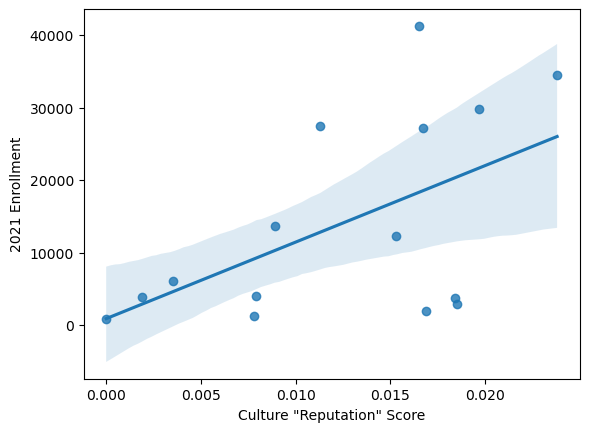

In [11]:
sns.regplot(data=schools, x='culture', y='enrollment')
plt.xlabel('Culture "Reputation" Score')
plt.ylabel('2021 Enrollment')
plt.show()

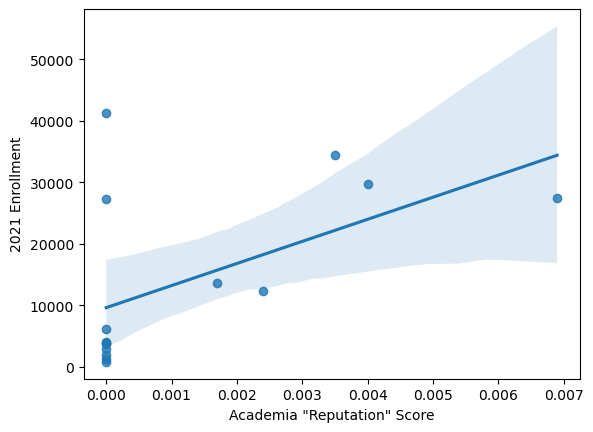

In [12]:
sns.regplot(data=schools, x='academia', y='enrollment')
plt.xlabel('Academia "Reputation" Score')
plt.ylabel('2021 Enrollment')
plt.show()

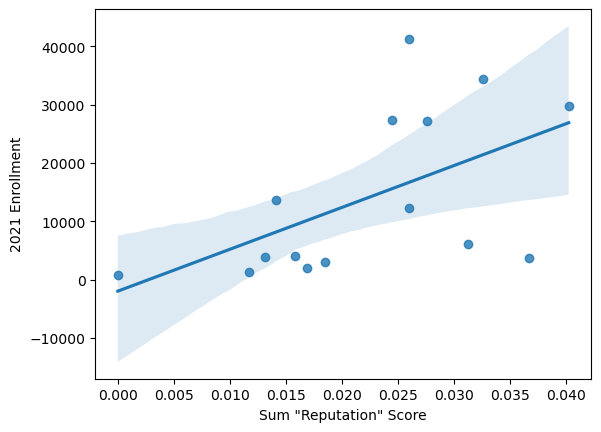

In [13]:
sns.regplot(data=schools, x='sum', y='enrollment')
plt.xlabel('Sum "Reputation" Score')
plt.ylabel('2021 Enrollment')
plt.show()

## Analysis 2: Are Utah's Universities or Colorado's universities better described by wikipedia?

First, we assembled a list of universities, both private and public from both states.

In [14]:
utah = [
    usu_text,
    uofu_text,
    uvu_text,
    suu_text,
    utech_text,
    weber_text,
    bridgerland_text,
    davis_text,
    mountainland_text,
    ogden_text,
    slcc_text,
    snow_text,
    southwest_text,
    tooele_text,
    uintah_text,
    wiki_wiki.page('Brigham Young University'),
    wiki_wiki.page('Broadview College'),
    wiki_wiki.page('Eagle Gate College'),
    wiki_wiki.page('Ensign College'),
    wiki_wiki.page('Fortis College'),
    wiki_wiki.page('Neumont College of Computer Science'),
    wiki_wiki.page('Rocky Mountain University of Health Professions'),
    wiki_wiki.page('Rocky Vista University'),
    wiki_wiki.page('Roseman University of Health Sciences'),
    wiki_wiki.page('Stevens–Henager College'),
    wiki_wiki.page('Webster University Utah'),
    wiki_wiki.page('Western Governors University'),
    wiki_wiki.page('Westminster University (Utah)'),
]

colorado = [
    wiki_wiki.page('Adams State University'),
    wiki_wiki.page('Aims Community College'),
    wiki_wiki.page('Colorado Mesa University'),
    wiki_wiki.page('Colorado Mountain College'),
    wiki_wiki.page('Colorado School of Mines'),
    wiki_wiki.page('Colorado State University'),
    wiki_wiki.page('Colorado State University Pueblo'),
    wiki_wiki.page('Fort Lewis College'),
    wiki_wiki.page('Metropolitan State University of Denver'),
    wiki_wiki.page('University of Colorado Boulder'),
    wiki_wiki.page('University of Colorado Colorado Springs'),
    wiki_wiki.page('University of Colorado Denver'),
    wiki_wiki.page('University of Northern Colorado'),
    wiki_wiki.page('Western Colorado University'),
    wiki_wiki.page('Colorado Community College System'),
    wiki_wiki.page('Colorado State University–Global Campus'),
    wiki_wiki.page('United States Air Force Academy'),
    wiki_wiki.page('Colorado Christian University'),
    wiki_wiki.page('Colorado College'),
    wiki_wiki.page('Nazarene Bible College'),
    wiki_wiki.page('Naropa University'),
    wiki_wiki.page('Regis University'),
    wiki_wiki.page('University of Denver'),
    wiki_wiki.page('Colorado Technical University'),
    wiki_wiki.page('DeVry University'),
    wiki_wiki.page('Rocky Mountain College of Art and Design'),
    wiki_wiki.page('William Howard Taft University'),
]

Next, we defined some metrics by which to grade wikipedia articles.

The metric has 5 components:
- section count: articles with larger numbers of sections are likely better organized and/or have greater detail
- reference count: articles with more references are considered better
- word count: longer articles can have more information in them
- image count: images can help readers engage more with the subject, or provide additional context
- internal links: articles with a large number of links to other wikipedia pages are easier to navigate and have more use

These are not perfect metrics, but are easy to calculate, and follow with some general intuition about what a good article should look like. The biggest flaw with this set of metrics is that it highly prioritizes length, and many of the metrics could end up being correlated with length (longer articles have more time for references, sections, links, etc). The metric is blind to the density of information in the article and to other harder to calculate metrics like style or voice.

In [15]:
def soup_to_row(soup: BeautifulSoup):
    section_count = len(soup.find_all(['h2', 'h3', 'h4']))
    reference_count = len(soup.find_all('cite'))
    word_count = len(soup.get_text().split())
    image_count = len(soup.find_all('img'))
    internal_links = len([a for a in soup.find_all('a', href=True) if '/wiki/' in a['href']])

    return {
        'section_count': section_count,
        'reference_count': reference_count,
        'word_count': word_count,
        'image_count': image_count,
        'internal_links': internal_links,
    }

columns = [
    'name',
    'state',
    'section_count',
    'reference_count',
    'word_count',
    'image_count',
    'internal_links',
]


utah_colorado = pd.DataFrame(columns=columns)

i = 0
for school in utah:
    url = school.fullurl
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    row = soup_to_row(soup)
    row['name'] = school.title
    row['state'] = "Utah"
    utah_colorado.loc[i] = row
    i += 1

for school in colorado:
    url = school.fullurl
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    row = soup_to_row(soup)
    row['name'] = school.title
    row['state'] = "Colorado"
    utah_colorado.loc[i] = row
    i += 1

utah_colorado.head()

,name,state,section_count,reference_count,word_count,image_count,internal_links
0,Utah State University,Utah,51,272,16595,63,625
1,University of Utah,Utah,31,208,11436,48,1043
2,Utah Valley University,Utah,25,37,4007,20,449
3,Southern Utah University,Utah,20,29,3653,22,336
4,Utah Tech University,Utah,21,80,6657,18,361


Next we MinMax normalized each metric, so the top scorer in each metric gets a score of 1, and the bottom scorer gets a score of 0. We calculated the overall score by taking the simple sum of the metrics (i.e. the metrics are evenly weighted).

In [16]:
# normalize data
def normalize(name: str, data: pd.DataFrame):
    data[name] = (data[name] - data[name].min()) / (data[name].max() - data[name].min())

normalize('section_count', utah_colorado)
normalize('reference_count', utah_colorado)
normalize('word_count', utah_colorado)
normalize('image_count', utah_colorado)
normalize('internal_links', utah_colorado)

utah_colorado['score'] = utah_colorado['section_count'] + utah_colorado['reference_count'] + utah_colorado['word_count'] + utah_colorado['image_count'] + utah_colorado['internal_links']
utah_colorado.sort_values('score', ascending=False).head()

,name,state,section_count,reference_count,word_count,image_count,internal_links,score
0,Utah State University,Utah,0.98,1.000000,1.000000,1.000000,0.388734,4.368734
44,United States Air Force Academy,Colorado,1.00,0.397059,0.972699,0.719298,1.000000,4.089056
15,Brigham Young University,Utah,0.66,0.819853,0.918470,0.666667,0.896384,3.961374
1,University of Utah,Utah,0.58,0.764706,0.679167,0.736842,0.679416,3.440131
37,University of Colorado Boulder,Colorado,0.98,0.397059,0.647139,0.719298,0.553547,3.297043


Then we analyzed the distribution of the scores for each state.

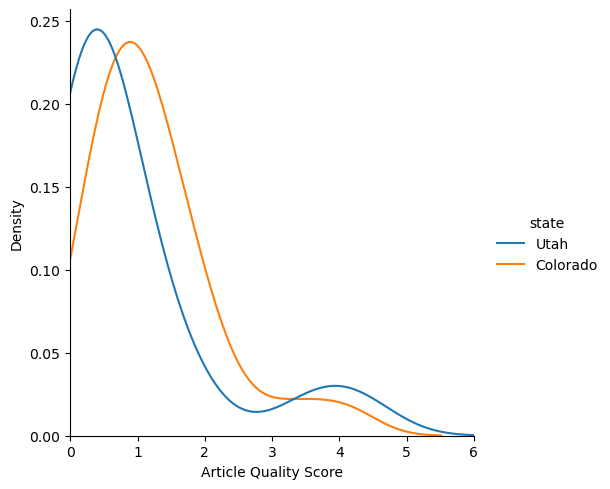

TtestResult(statistic=-1.138322237731114, pvalue=0.26010545957673853, df=53.0)

In [17]:
sns.displot(utah_colorado, x='score', hue='state', kind='kde')
plt.xlabel('Article Quality Score')
plt.ylabel('Density')
plt.xlim(0, 6)
plt.show()

stats.ttest_ind(utah_colorado[utah_colorado['state'] == 'Utah'].score, utah_colorado[utah_colorado['state'] == 'Colorado'].score)

The data shows that overall the average score for articles relating to Utah schools are worse than those relating to Colorado schools, but the T-Test has a P-value of ~0.26, meaning that the result is not statistically signifigant.

It is possible that with a larger sample size, the result could become signifigant but this sample is (to my knowledge) the entire population of wikipedia articles pertaining to universities and colleges in Utah and Colorado.

It is also worth noting that Utah in particular has two outliers in its data, the articles for USU and BYU seem to be far away from the bulk of the data in Utah, seen in the above chart as the second "hump" at around 4.

## References

Dugovic, Trisha. “Enrollment at Utah’s Public Colleges and Universities Grows Overall.” *Utah System of Higher Education*, 25 Oct. 2021, https://ushe.edu/2021-fall-enrollment/.

# **Analysis 3: Comparative Analysis of University Major Quality Parameters: Utah Universities**

This report provides a comparative analysis of six major universities in Utah, based on key quality parameters. The universities analyzed are:
<li>Utah State University</li>
<li>University of Utah</li>
<li>Utah Valley University</li>
<li>Southern Utah University</li>
<li>Utah Tech University</li>
<li>Weber State University</li>

The analysis focuses on various major parameters including the year of establishment, the number of undergraduate and graduate students, research funding, annual budget, number of faculties, and faculty-student ratios. The data for this analysis has been sourced from the Wikipedia pages of the corresponding universities.

# Data Collection and Preprocessing
The primary data was scraped using the Python library BeautifulSoup to access the HTML content of the Wikipedia pages. For numerical data such as student enrollment, research funding, and budgets, regular expressions (re) were used to extract values from the text. In cases where monetary values were inconsistent, the amounts were standardized to millions. Missing values (where data could not be found) were handled by substituting them with "NaN."


# Parameters Considered
**Year of Establishment:** This parameter provides insights into the historical legacy and development of each institution.</br>
**Undergraduate Enrollment:** Reflects the size and popularity of the undergraduate programs offered.</br>
**Graduate Enrollment:** Provides insight into the institution’s focus on higher education and research.</br>
**Research Funding:** Research funding is critical for assessing the university's contribution to research and innovation.</br>
**Annual Budget:** Reflects the overall financial capacity of the institution, which affects infrastructure, faculty, research, and student services.</br>
**Number of Faculty:** Indicates the academic resources available to students and the breadth of academic support.

**Faculty-Student Ratio Calculation:** </p>The faculty-student ratio was calculated by dividing the total number of faculty members by the combined total of undergraduate and graduate students for each university.

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Function to scrape data from Wikipedia pages
def scrape_university_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extract university name
    university_name = soup.find('h1').text
    
    # Extract key data from the infobox
    infobox = soup.find('table', {'class': 'infobox'})
    data = {}

    for row in infobox.find_all('tr'):
        header = row.find('th')
        value = row.find('td')

        if header and value:
            header_text = header.text.strip()
            value_text = value.text.strip()
            data[header_text] = value_text
    

    data['Established'] = int(re.findall(r'\d{4}', data['Established'])[0])
    data['Undergraduates'] = int(re.findall(r'\d+\,\d+|\d+', data['Undergraduates'])[0].replace(',', '').strip())
    data['Postgraduates'] = int(re.findall(r'\d+\,\d+|\d+', data['Postgraduates'])[0].replace(',', '').strip())
    if data.get('Academic staff', 'Not available') == 'Not available':
        data['Academic staff'] = None
    else:
        data['Academic staff'] = int(re.findall(r'\d+\,\d+|\d+', data['Academic staff'])[0].replace(',', '').strip())
    data['Students'] = int(re.findall(r'\d+\,\d+|\d+', data['Students'])[0].replace(',', '').strip())

    if data.get('Endowment', 'Not available') == 'Not available':
        data['Endowment'] = None
    else:
        if 'million' in str(data['Endowment']):
            data['Endowment'] = float(re.findall(r'\d+\.\d+|\d+', data['Endowment'])[0])
        elif 'billion' in str(data['Endowment']):
            data['Endowment'] = float(re.findall(r'\d+\.\d+|\d+', data['Endowment'])[0]) * 1000
        else:
            data['Endowment'] = float(re.findall(r'\d+\.\d+|\d+', data['Endowment'])[0])/1000000
            
    if data.get('Budget', 'Not available') == 'Not available':
        data['Budget'] = None
    else:
        if 'million' in str(data['Budget']):
            data['Budget'] = float(re.findall(r'\d+\.\d+|\d+', data['Budget'])[0])
        elif 'billion' in str(data['Budget']):
            data['Budget'] = float(re.findall(r'\d+\.\d+|\d+', data['Budget'])[0]) * 1000
        else:
            data['Budget'] = float(re.findall(r'\d+\.\d+|\d+', data['Budget'])[0]) / 1000000

    # Extract relevant data
    Established = data.get('Established', 'Not available')
    undergraduates = data.get('Undergraduates', 'Not available')
    postgraduates = data.get('Postgraduates', 'Not available')
    faculty = data.get('Academic staff', 'Not available')
    endowment = data.get('Endowment', 'Not available')
    budget = data.get('Budget', 'Not available')
    university_ranking = data.get('Ranking', 'Not available')

    return {
        'University': university_name,
        'Established': Established,
        'Undergraduate Enrollment': undergraduates,
        'Graduate Enrollment': postgraduates,
        'Research Funding': endowment,
        'Budget': budget,
        'Faculty': faculty,
        'Ranking': university_ranking
    }

# URLs of the Wikipedia pages
usu_url = 'https://en.wikipedia.org/wiki/Utah_State_University'
uou_url = 'https://en.wikipedia.org/wiki/University_of_Utah'
uvu_url = 'https://en.wikipedia.org/wiki/Utah_Valley_University'
suu_url = 'https://en.wikipedia.org/wiki/Southern_Utah_University'
utech_url = 'https://en.wikipedia.org/wiki/Utah_Tech_University'
weber_url = 'https://en.wikipedia.org/wiki/Weber_State_University'

# Scrape data
usu_data = scrape_university_data(usu_url)
uou_data = scrape_university_data(uou_url)
uvu_data = scrape_university_data(uvu_url)
suu_data = scrape_university_data(suu_url)
utech_data = scrape_university_data(utech_url)
weber_data = scrape_university_data(weber_url)

In [19]:
df = pd.DataFrame([usu_data, uou_data, uvu_data, suu_data, utech_data, weber_data])
df

,University,Established,Undergraduate Enrollment,Graduate Enrollment,Research Funding,Budget,Faculty,Ranking
0,Utah State University,1888,25048,3015,538.400000,699.3,1101.0,Not available
1,University of Utah,1850,26827,8409,1640.000000,6750.0,4858.0,Not available
2,Utah Valley University,1941,43796,857,100.000000,NaN,NaN,Not available
3,Southern Utah University,1897,12080,1531,NaN,NaN,282.0,Not available
4,Utah Tech University,1911,12481,75,NaN,NaN,423.0,Not available
5,Weber State University,1889,28903,1011,0.000219,NaN,1046.0,Not available


In [20]:
df['faculty_student_ratio'] = df['Faculty'] / (df['Undergraduate Enrollment']+df['Graduate Enrollment'])

In [21]:
df.drop(columns=['Ranking'], inplace=True)
df

,University,Established,Undergraduate Enrollment,Graduate Enrollment,Research Funding,Budget,Faculty,faculty_student_ratio
0,Utah State University,1888,25048,3015,538.400000,699.3,1101.0,0.039233
1,University of Utah,1850,26827,8409,1640.000000,6750.0,4858.0,0.137870
2,Utah Valley University,1941,43796,857,100.000000,NaN,NaN,NaN
3,Southern Utah University,1897,12080,1531,NaN,NaN,282.0,0.020719
4,Utah Tech University,1911,12481,75,NaN,NaN,423.0,0.033689
5,Weber State University,1889,28903,1011,0.000219,NaN,1046.0,0.034967


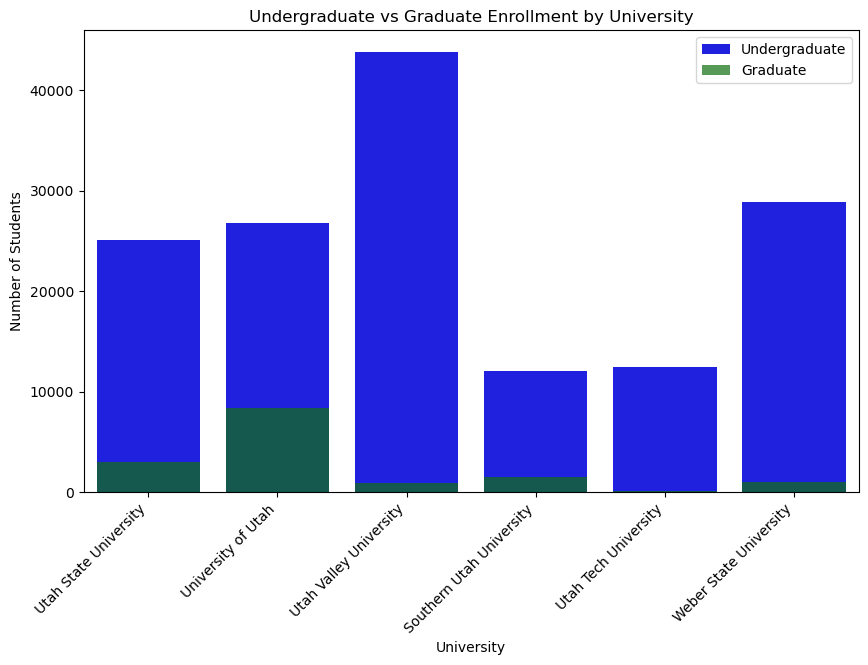

In [22]:
# 2. Bar plot of Undergraduate vs. Graduate Enrollment
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='University', y='Undergraduate Enrollment', data=df, color='blue', label="Undergraduate")
sns.barplot(x='University', y='Graduate Enrollment', data=df, color='green', label='Graduate', alpha=0.7)
plt.title('Undergraduate vs Graduate Enrollment by University')
plt.legend()
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Number of Students')
plt.show()

 From the above barplot figure, it can be seen that the number of undergraduate students varies significantly between the universities. Utah Valley University stands out as having the highest undergraduate enrollment, outpacing even prestigious institutions like University of Utah and Utah State University. Despite their prominence, these two universities have a smaller undergraduate body compared to Utah Valley University. On the other hand, Utah Tech University only offers undergraduate programs and therefore has no graduate student body.

In terms of graduate enrollment, the University of Utah has a significant edge over other universities, reflecting its strong emphasis on research and postgraduate studies. Utah State University follows but lags behind the University of Utah. It’s important to note that institutions like Utah Tech University do not offer graduate programs, and hence have no graduate student data.

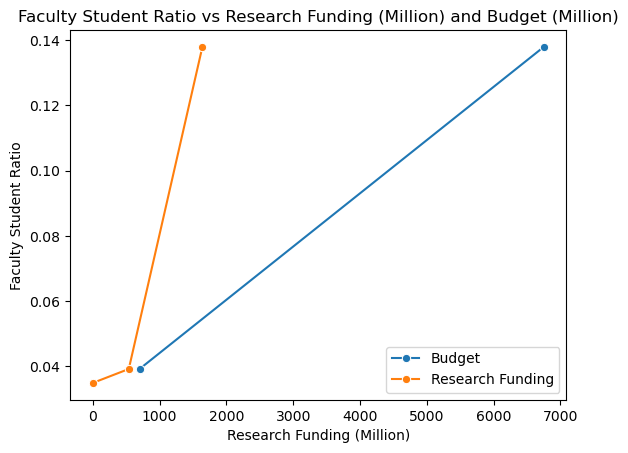

In [23]:
# 5. Line plot of Faculty Student Ratio vs Research Funding and Budget
sns.lineplot(data=df, x='Budget', y='faculty_student_ratio', marker='o', label='Budget')
sns.lineplot(data=df, x='Research Funding', y='faculty_student_ratio', marker='o', label='Research Funding')
plt.title('Faculty Student Ratio vs Research Funding (Million) and Budget (Million)')
plt.xlabel('Research Funding (Million)')
plt.ylabel('Faculty Student Ratio')
plt.show()

Frome the above line graph, we can see that universities with higher research funding typically perform better in research output, and this is reflected in the University of Utah, which has the highest research funding and annual budget. Utah State University also shows substantial research funding but not on par with the University of Utah. Low ranked institutions like Southern Utah University and Weber State University have comparatively lower research funding and budgets, reflecting their focus on teaching rather than research.

There is a clear relationship between higher budgets, research funding, and faculty-student ratios. Universities with higher research funding, such as the University of Utah, tend to have a higher faculty-student ratio, suggesting better academic support and smaller class sizes. This trend is also seen in Utah State University, which also maintains a reasonable faculty-student ratio given its resources.